In [17]:
import pandas as pd

df = pd.read_csv('auto-mpg.csv')

continuous_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for var in continuous_vars:
    median_val = df[var].median()
    df[var] = df[var].apply(lambda x: 'high' if x > median_val else 'low')

print(df.head())

   mpg  cylinders displacement horsepower weight acceleration  model year  \
0  low          8         high       high   high          low          70   
1  low          8         high       high   high          low          70   
2  low          8         high       high   high          low          70   
3  low          8         high       high   high          low          70   
4  low          8         high       high   high          low          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


2. [45 points] Structure Learning
    a. [15 pts] Perform structure learning using conditional independence tests (PC
    algorithm)
    b. [30 pts] Perform structure learning using score-based method (Hill Climb
    Search). Use BIC score, BDs score, and K2 score

https://pgmpy.org/structure_estimator/pc.html#module-pgmpy.estimators.CITests

variant (str (one of "orig", "stable", "parallel")) –

The variant of PC algorithm to run. 
“orig”: The original PC algorithm. Might not give the same results in different runs but does less independence tests compared to stable.

”stable”: Gives the same result in every run but does needs to
do more statistical independence tests.

”parallel”: Parallel version of PC Stable. Can run on multiple
cores with the same result on each run.

  0%|          | 0/4 [00:00<?, ?it/s]

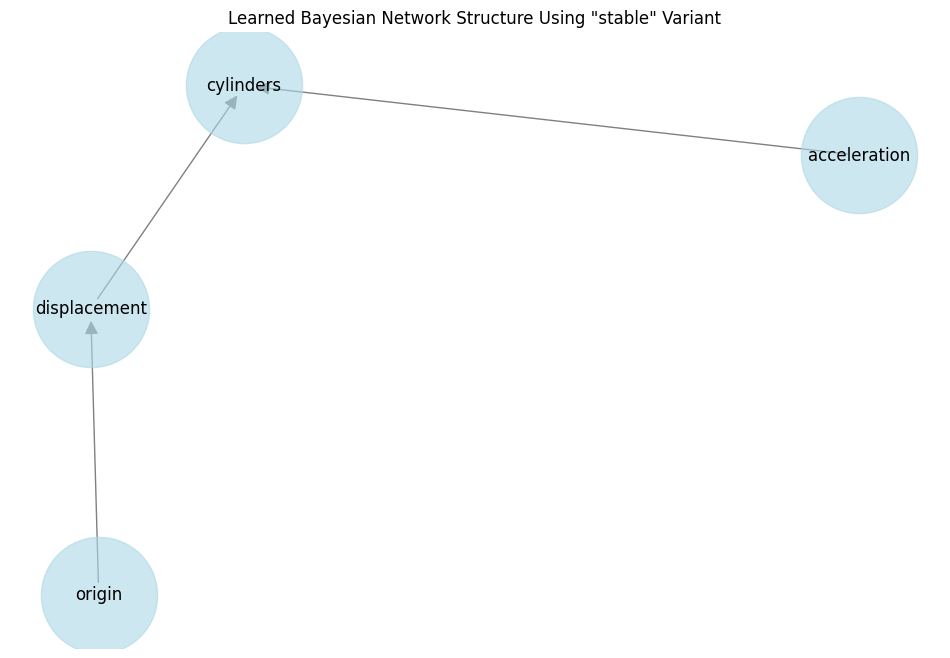

  0%|          | 0/4 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

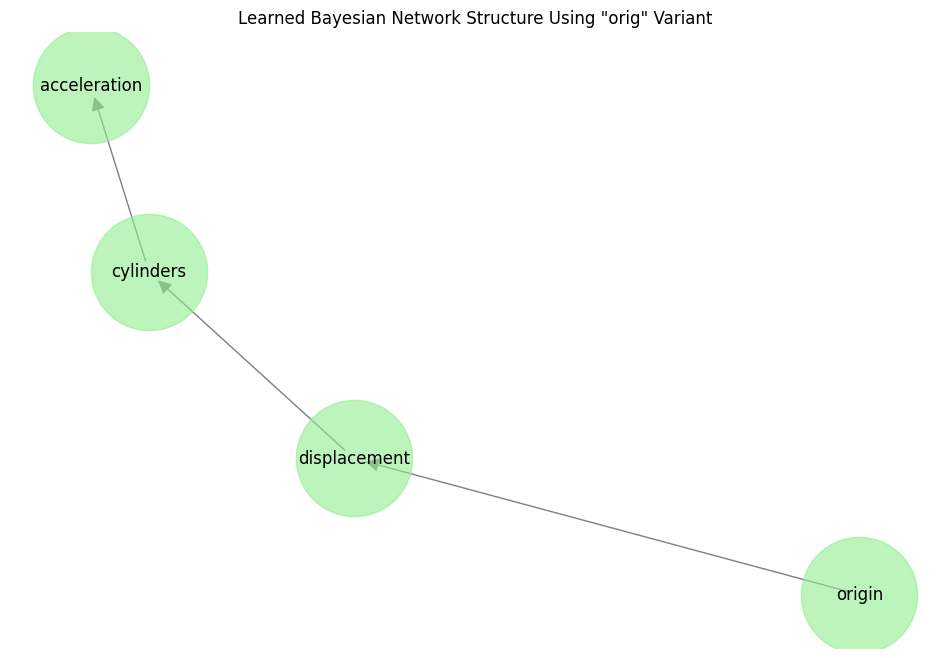

  0%|          | 0/4 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

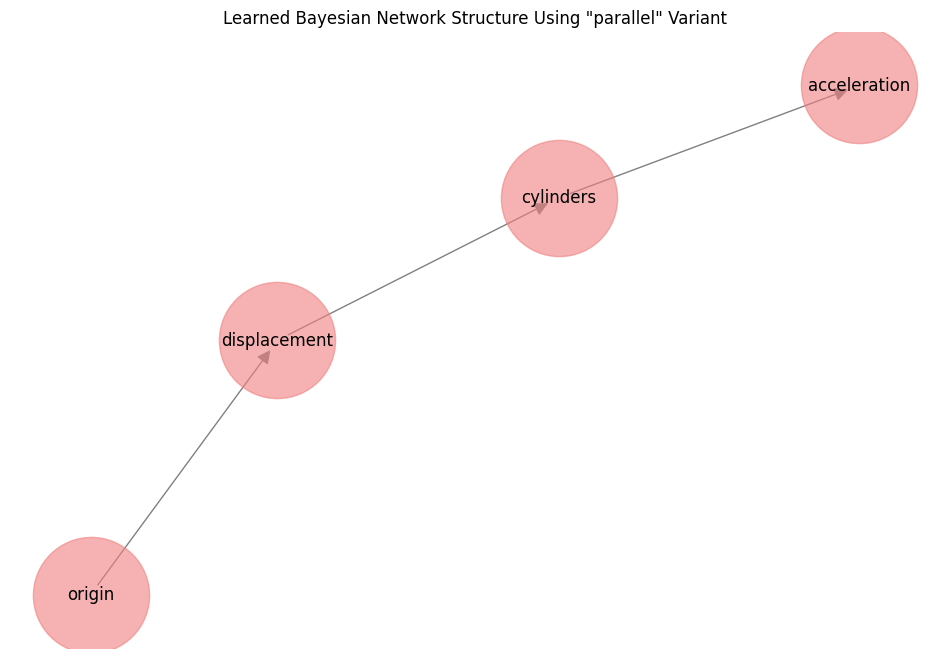

<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import networkx as nx
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
import matplotlib.pyplot as plt

# Variants of the PC algorithm to be tested
variants = ['stable', 'orig', 'parallel']

for variant in variants:
    est = PC(data=df)
    estimated_model = est.estimate(variant=variant, max_cond_vars=4, return_type='dag', ci_test='chi_square')

    model = BayesianNetwork(estimated_model.edges())

    G = nx.DiGraph()
    G.add_edges_from(model.edges())

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue' if variant == 'stable' else 'lightgreen' if variant == 'orig' else 'lightcoral', alpha=0.6)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    plt.title(f'Learned Bayesian Network Structure Using "{variant}" Variant')
    plt.axis('off')

    plt.savefig(f'bayesian_network_{variant}.png')  
    plt.show()

    plt.clf()